## 뉴욕시의 Taxi 데이터 활용한 예측 모델

In [3]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [4]:
# 데이터 불러오기
FILE='C:/Users/User/Data/taxi_train.csv'

df=pd.read_csv(FILE, nrows=50000, parse_dates=['pickup_datetime'])

In [5]:
df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
# 결측치 및 이상치 체크
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  50000.000000      50000.000000     50000.000000       50000.000000   
mean      11.364171        -72.509756        39.933759         -72.504616   
std        9.685557         10.393860         6.224857          10.407570   
min       -5.000000        -75.423848       -74.006893         -84.654241   
25%        6.000000        -73.992062        40.734880         -73.991152   
50%        8.500000        -73.981840        40.752678         -73.980082   
75%       12.500000        -73.967148        40.767360         -73.963584   
max      200.000000         40.783472       401.083332          40.851027   

       dropoff_latitude  passenger_count  
count      50000.000000     50000.000000  
mean          39.926251         1.667840  
std            6.014737         1.289195  
min          -74.006377         0.000000  
25%           40.734372         1.000000  
50%           40.753372         1.000000  
75%           40.768167         2.000000  
max           43.415190         6.000000

In [9]:
# 뉴욕 위도 경도
df = df[(df["pickup_longitude"] <= -71.47) & (df["pickup_longitude"] >= -79.45)]
df = df[(df["pickup_latitude"] >= 40.29) & (df["pickup_latitude"] <= 45)]
df = df[(df["dropoff_longitude"] <= -71.47) & (df["dropoff_longitude"] >= -79.45)]
df = df[(df["dropoff_latitude"] >= 40.29) & (df["dropoff_latitude"] <= 45)]

# 요금 음수 지우기
df = df[df['fare_amount']>0]

In [10]:
# 거리 특성 생성
df['distance']=((df['dropoff_longitude']-df['pickup_longitude'])**2+(df['dropoff_latitude']-df['pickup_latitude'])**2)**0.5

In [11]:
# 거리 0이상만 남기기
df=df[df['distance']>0]

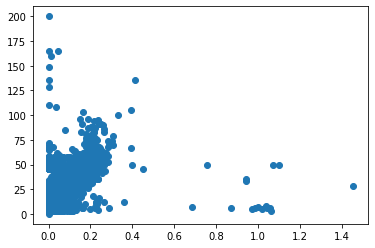

In [12]:
# 데이터 확인
plt.scatter(df['distance'],df['fare_amount'])
plt.show()

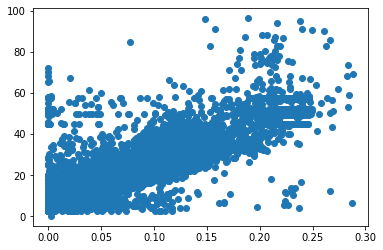

In [13]:
# 이상치 제거
df=df[(df['distance']<0.3) & (df['fare_amount']<100)]
plt.scatter(df['distance'],df['fare_amount'])
plt.show()

In [14]:
# 형변환
arrX=np.array(df['distance']).reshape(-1,1)
arrY=np.array(df['fare_amount'])

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
arrX, arrY, random_state=42)

In [15]:
# 선형 회귀
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)


# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)

# 평가
print(lr.score(test_input, test_target))

[216.99405377] 3.8390382837410018
0.8018576471321748


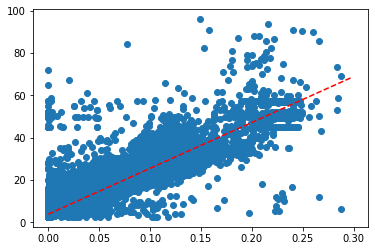

In [16]:
# 그래프로 확인
point=np.arange(0, 0.3, 0.001)

plt.scatter(train_input,train_target)
plt.plot(point, 217*point +3.8, color='red', linestyle='--')
plt.show()

---
## 당뇨 데이터 예측

In [17]:
# 데이터 불러오기
FILE='C:/Users/User/Data/diabetes.csv'

df=pd.read_csv(FILE)

In [18]:
# 결측치 및 이상치
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [20]:
# 형변환
arrX= np.array(df.iloc[:,:8]).reshape(-1,8)
arrY= np.array(df['Outcome'])

In [21]:
# 모델 객체 생성
model = LogisticRegression()

# 훈련
model.fit(arrX, arrY)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
print('w:', model.coef_, 'b:', model.intercept_)

w: [[ 1.17252342e-01  3.35999295e-02 -1.40873538e-02 -1.27044937e-03
  -1.24032635e-03  7.72022437e-02  1.41904200e+00  1.00352835e-02]] b: [-7.70292103]


In [29]:
# 예측
preY=model.predict_proba([[6,148,72,35,0,33.6,0.627,50]])
print('당뇨아닐확률:',preY[0][0],'\n당뇨일 확률:',preY[0][1])

당뇨아닐확률: 0.2890245472612647 
당뇨일 확률: 0.7109754527387353
